# Análise Exploratória da base de aluguéis

Nesse *notebook* é parte do projeto *Aplicando Auto Machine Learning (PyCaret) para previsão de preços de alguéis*. Para que o projeto não ficasse muito extenso, optei por fazer a parte essa separado do projeto principal.

## Dados

Aqui irei responder a algumas hipóteses sobre a base de dados e entender os dados. Os dados desse projeto podem ser obtidos em [aqui](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent). A base de dados possui treze (13) colunas, 10692 linhas e as suas variáveis são :

1) city : Cidade onde o imóvel está localizada;

2) area: Área do imóvel/Property area;

3) rooms: Número de quartos/Quantity of rooms;

4) bathroom : Número de banheiros/Quantity of bathroom;

5) parking spaces: Número de vagas/Quantity of parking spaces;

6) floor: Andar/Floor;

7) animal: Aceita animais?/Acept animals?;

8) furniture: Mobilhada?/Furniture?;

9) hoa (R$): Valor do condomínio em reais/Homeowners association tax;

10) rent amount (R$): Valor do Aluguel/Rent amount;

11) property tax;

12) fire insurance (R$);

13) total (R$).

## Importando as bibliotecas

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando a base de dados

In [42]:
aluguel=pd.read_csv('houses_to_rent_v2.csv')

In [43]:
aluguel.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


## Hipóteses

Irei formular algumas perguntas e usarei os dados para respondê-las:

1) Qual a cidade com maior média de preços e de taxas ?

2) Casas com mais cômodos (quarto, banheiro, etc.) possuem preços maiores ?

3) A área influência no preço do aluguel ?

4) Uma casa que aceita animais possue o aluguel mais alto ?

5) Casas mobiliadas possuem o preço do aluguel maior ?

### Hipótese 1

Ao todo temos cidades cidades: São Paulo (SP), Rio de Janeiro (RJ), Belo Horizonte (MG) , Porto Alegre (RS) e Campinas (SP). A maioria das casas alugadas são na cidade de São Paulo.

In [44]:
aluguel['city'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

Para saber qual a cidade de maior média, vamos plotar um gráfico de barras.

Vemoas que as cidades com maior médio de preços de aluguéis são **Belo Horizonte**, **São Paulo** e **Rio de Janeiro**.

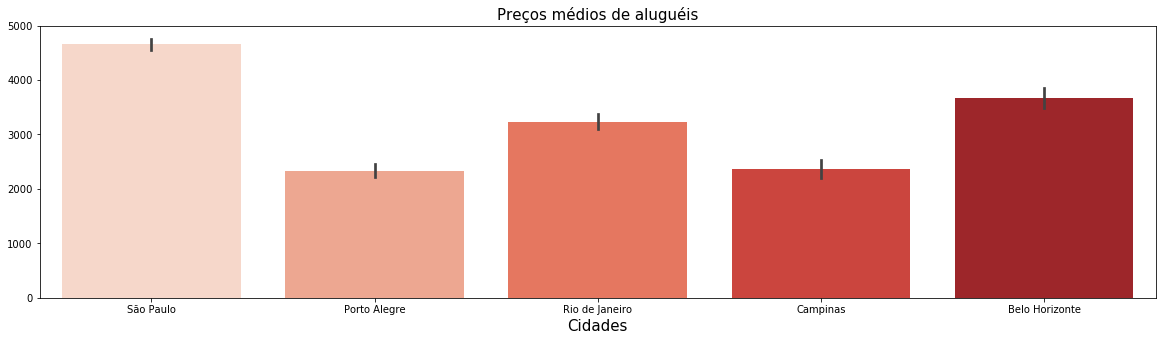

In [46]:
plt.figure(figsize=(20,5))
sns.barplot(x='city', y='rent amount (R$)', data=aluguel, palette='Reds')
plt.title('Preços médios de aluguéis',size=15)
plt.xlabel('Cidades', size=15)
plt.ylabel("");

### Hipótese 2

Vamos analisar aqui três variáveis: *rooms*, *bathroom* e *parking space*.

Para a primeira *feature* vemos que a medida que o número de salas em uma casa é maior, o preço médio do aluguel também é maior.

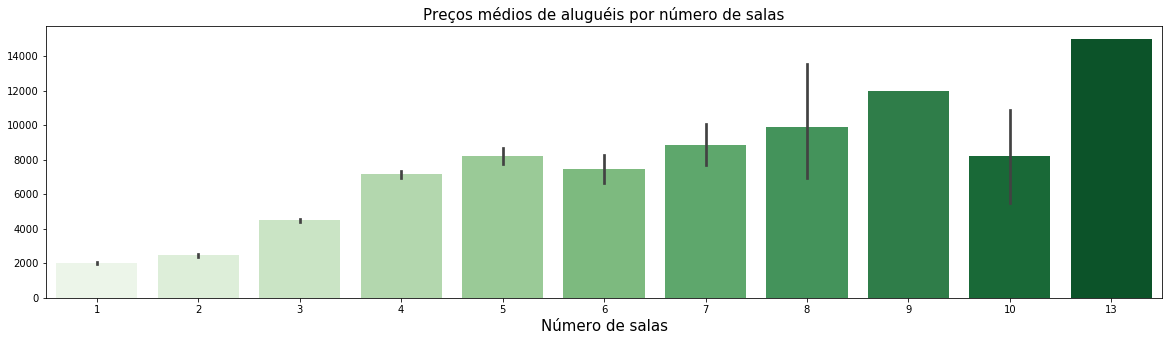

In [47]:
plt.figure(figsize=(20,5))
sns.barplot(x='rooms', y='rent amount (R$)', data=aluguel, palette='Greens')
plt.title('Preços médios de aluguéis por número de salas',size=15)
plt.xlabel('Número de salas', size=15)
plt.ylabel("");

Abaixo vemos que a medida que o número de banheiros de uma casa ou apartamento aumenta, o valor médio do aluguel também aumenta.

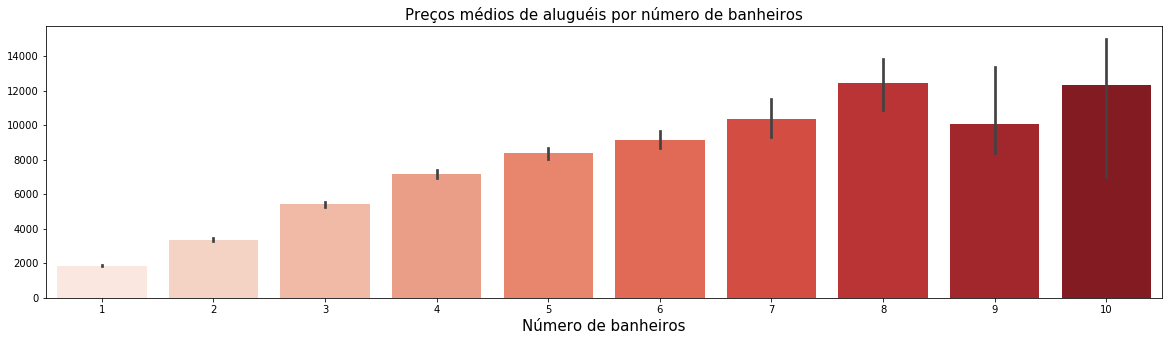

In [49]:
plt.figure(figsize=(20,5))
sns.barplot(x='bathroom', y='rent amount (R$)', data=aluguel, palette='Reds')
plt.title('Preços médios de aluguéis por número de banheiros',size=15)
plt.xlabel('Número de banheiros', size=15)
plt.ylabel("");

Em número de vagas de estacionamento os preços médios crescem até sete vagas e depois declina.

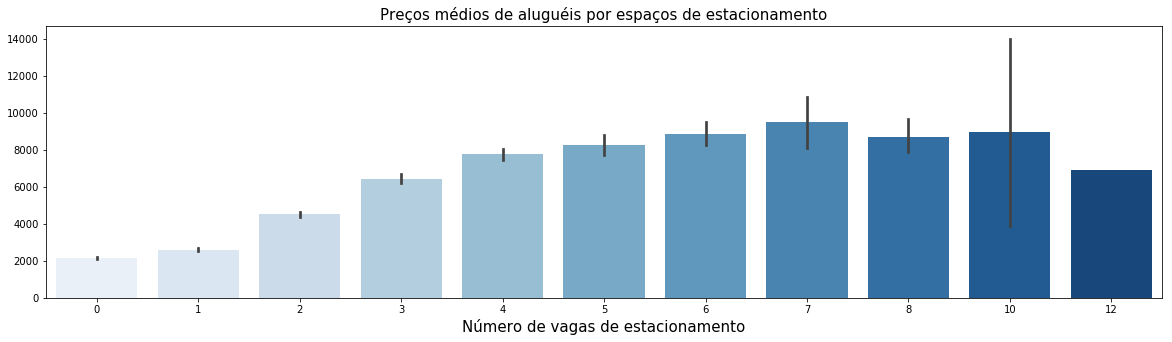

In [50]:
plt.figure(figsize=(20,5))
sns.barplot(x='parking spaces', y='rent amount (R$)', data=aluguel, palette='Blues')
plt.title('Preços médios de aluguéis por espaços de estacionamento',size=15)
plt.xlabel('Número de vagas de estacionamento', size=15)
plt.ylabel("");

Vemos que a quantidade de cômodos influencia até certo ponto o preço médio. Irei averiguar agora o número total de cômodos em relação ao preço dos aluguéis, mas para isso irei criar uma nova *feature* que é a soma das três *features* anteriores.

In [51]:
aluguel['comodo']=aluguel['rooms']+aluguel['bathroom']+aluguel['parking spaces']

Plotaremos o gráfico de barra.

Vemos que os preços médios vão subindo até 19 cômodos e depois vem uma queda. Então, podemos concluir que há uma influência dos cômodos nos preços dos aluguéis.

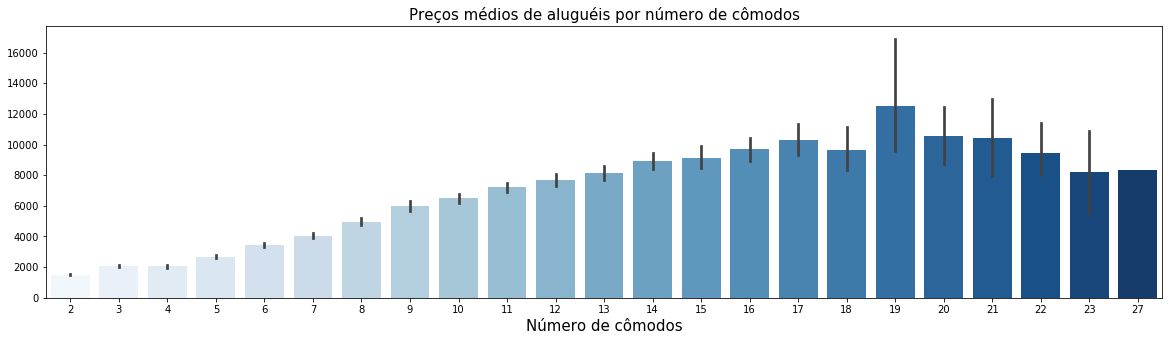

In [52]:
plt.figure(figsize=(20,5))
sns.barplot(x='comodo', y='rent amount (R$)', data=aluguel, palette='Blues')
plt.title('Preços médios de aluguéis por número de cômodos',size=15)
plt.xlabel('Número de cômodos', size=15)
plt.ylabel("");

### Hipótese 3

Aqui irei trabalhar com as *features* *area*.

Vemos no gráfico de regressão abaixo que os dados não apresentam ter alguma correlação.

Text(0.5, 1.0, 'Relação Área e Preço do aluguel')

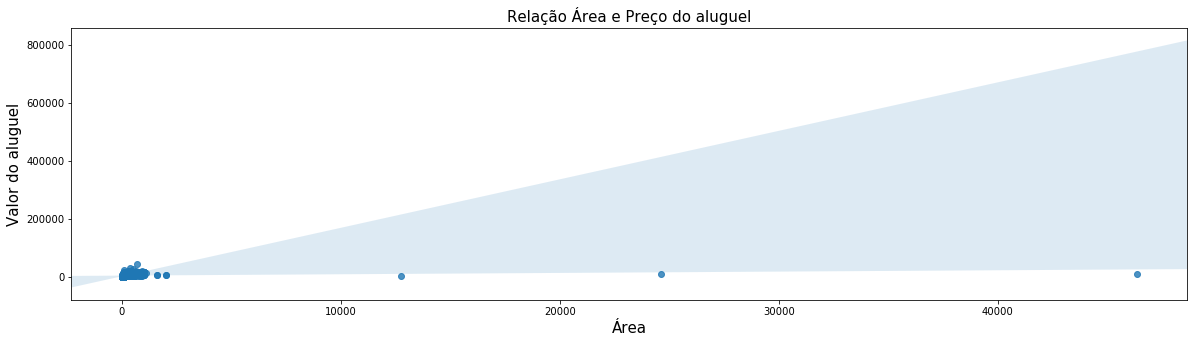

In [53]:
plt.figure(figsize=(20,5))
sns.regplot(x='area',y='rent amount (R$)',data=aluguel)
plt.xlabel('Área',size=15)
plt.ylabel('Valor do aluguel',size=15)
plt.title('Relação Área e Preço do aluguel',size=15)

### Hipótese 4

A maioria das casas aceitam a presença de aniamis.

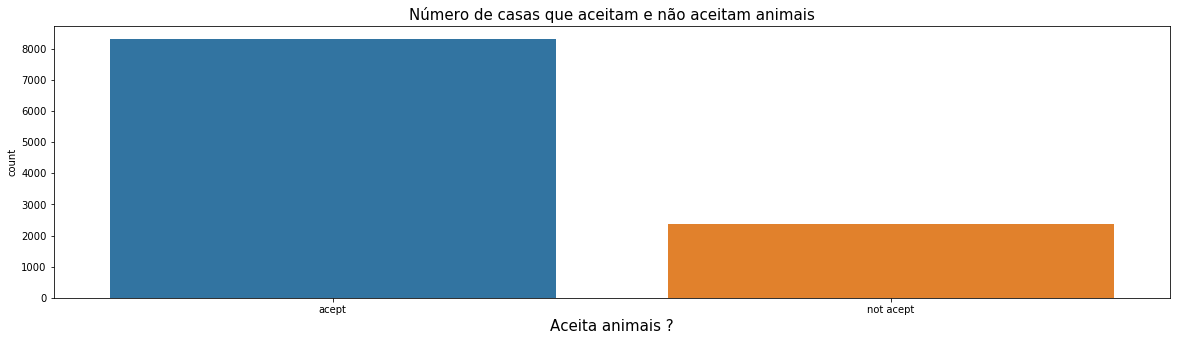

In [59]:
plt.figure(figsize=(20,5))
sns.countplot(x='animal',data=aluguel)
plt.title('Número de casas que aceitam e não aceitam animais',size=15)
plt.xlabel('Aceita animais ?',size=15);

Casas ou apartamentos que aceitam animais possuem um valor médio de aluguel maior.

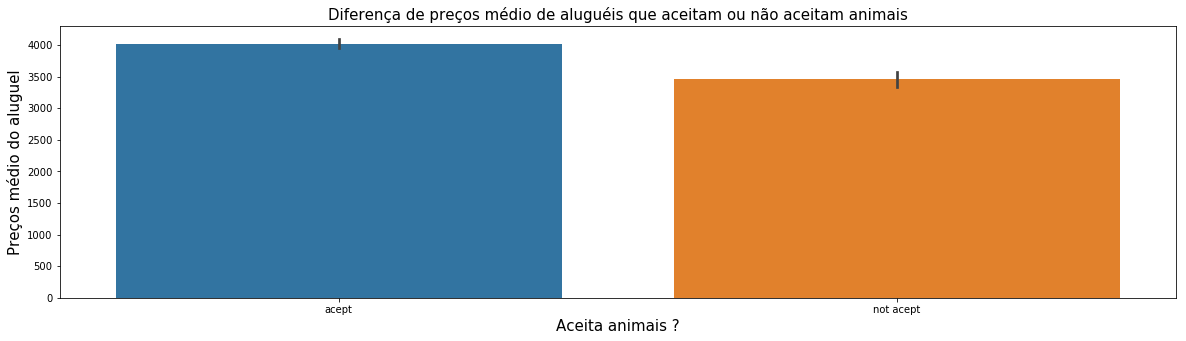

In [57]:
plt.figure(figsize=(20,5))
sns.barplot(x='animal', y='rent amount (R$)',data=aluguel)
plt.title('Diferença de preços médio de aluguéis que aceitam ou não aceitam animais',size=15)
plt.xlabel('Aceita animais ?',size=15)
plt.ylabel('Preços médio do aluguel',size=15);

### Hipótese 5

A maior parte das casas ou apartamentos não são mobiliados.

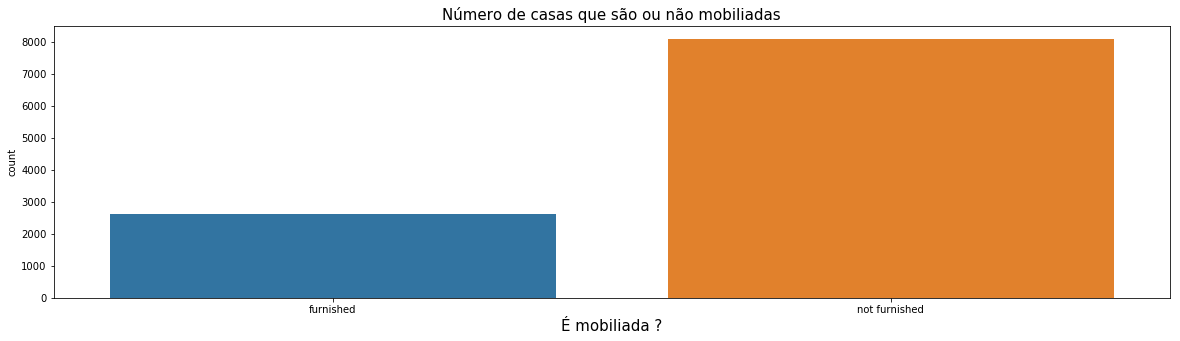

In [62]:
plt.figure(figsize=(20,5))
sns.countplot(x='furniture',data=aluguel)
plt.title('Número de casas que são ou não mobiliadas',size=15)
plt.xlabel('É mobiliada ?',size=15);

Entretanto as casas mobiliadas possuem um valor médio de aluguel maior.

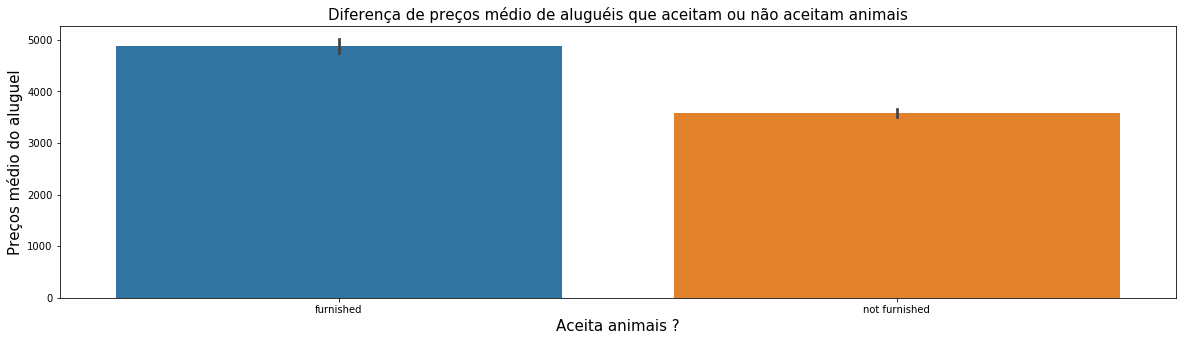

In [63]:
plt.figure(figsize=(20,5))
sns.barplot(x='furniture', y='rent amount (R$)',data=aluguel)
plt.title('Diferença de preços médio de aluguéis que aceitam ou não aceitam animais',size=15)
plt.xlabel('Aceita animais ?',size=15)
plt.ylabel('Preços médio do aluguel',size=15);